In [1]:
import numpy as np
from tensorflow.keras.datasets import imdb
from tensorflow.keras import layers, models, optimizers

from tensorflow.keras import layers, models, optimizers
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession
from tensorflow.compat.v1.keras.backend import set_session
from tensorflow.compat.v1 import ConfigProto, Session
import tensorflow.keras
config = ConfigProto(allow_soft_placement=True)

config.gpu_options.per_process_gpu_memory_fraction = 0.7
set_session(Session(config=config))

In [11]:
(input_train, label_train), (input_test, label_test) = imdb.load_data(num_words=10000)

In [12]:
from tensorflow.keras.preprocessing import sequence
max_features = 10000
max_len = 500
X_train = sequence.pad_sequences(input_train, maxlen=max_len)
X_test = sequence.pad_sequences(input_test, maxlen=max_len)

In [24]:
model = models.Sequential()
model.add(
    layers.Embedding(max_features, 128, input_length=max_len)
)
model.add(
    layers.Conv1D(32, 7, activation='relu')     #32 filters数目 7 窗口size
)
#output_shape = (None, 494, 32)
model.add(
    layers.MaxPooling1D(5)
)
#output_shape = (None, 494//5 + ... , 32)
model.add(
    layers.Conv1D(32, 7, activation='relu')
)
#output_shape = (None, last_input_shape[1] - 6, 32)
model.add(
    layers.GlobalMaxPool1D()        #对当前 通道[1]中的信号取最大 即 MaxPooling(last_input_shape[1])
)
model.add(
    layers.Dropout(0.5)
)
model.add(
    layers.Dense(512, activation='relu')
)
model.add(
    layers.Dense(1, activation='sigmoid')
)
model.summary()
model.compile(
    optimizer=optimizers.RMSprop(),
    loss='binary_crossentropy',
    metrics=['acc']
)

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_7 (Embedding)      (None, 500, 128)          1280000   
_________________________________________________________________
conv1d_14 (Conv1D)           (None, 494, 32)           28704     
_________________________________________________________________
max_pooling1d_7 (MaxPooling1 (None, 98, 32)            0         
_________________________________________________________________
conv1d_15 (Conv1D)           (None, 92, 32)            7200      
_________________________________________________________________
global_max_pooling1d_7 (Glob (None, 32)                0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_11 (Dense)             (None, 512)              

In [25]:
history = model.fit(
                    X_train, label_train,
                    validation_split=0.2,
                    epochs=10,
                    batch_size=128
                )

Epoch 1/10
157/157 [==============================] - 8s 45ms/step - loss: 0.6546 - acc: 0.5727 - val_loss: 0.5118 - val_acc: 0.7508
Epoch 2/10
157/157 [==============================] - 6s 40ms/step - loss: 0.3342 - acc: 0.8629 - val_loss: 0.3566 - val_acc: 0.8482
Epoch 3/10
157/157 [==============================] - 6s 40ms/step - loss: 0.2255 - acc: 0.9148 - val_loss: 0.3115 - val_acc: 0.8788
Epoch 4/10
157/157 [==============================] - 6s 40ms/step - loss: 0.1605 - acc: 0.9422 - val_loss: 0.3355 - val_acc: 0.8732
Epoch 5/10
157/157 [==============================] - 6s 40ms/step - loss: 0.0971 - acc: 0.9657 - val_loss: 0.5322 - val_acc: 0.8364
Epoch 6/10
157/157 [==============================] - 6s 40ms/step - loss: 0.0641 - acc: 0.9791 - val_loss: 0.4012 - val_acc: 0.8786
Epoch 7/10
157/157 [==============================] - 6s 40ms/step - loss: 0.0362 - acc: 0.9879 - val_loss: 0.5255 - val_acc: 0.8610
Epoch 8/10
157/157 [==============================] - 6s 40ms/step - 

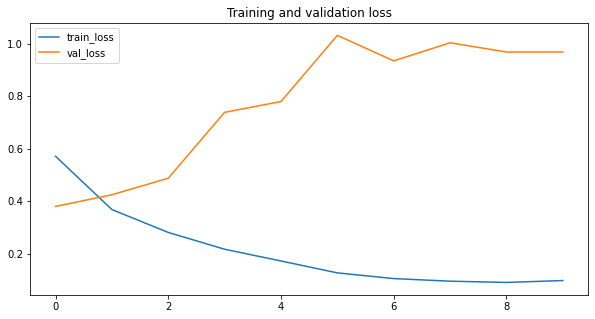

In [15]:
from matplotlib import pyplot as plt
train_loss = history.history['loss']
val_loss = history.history['val_loss']
plt.figure(figsize=(10, 5))
plt.plot(train_loss)
plt.plot(val_loss)
plt.title('Training and validation loss')
plt.legend(['train_loss','val_loss'])